# Assignment Part 1: Perceptron Template

This file contains the template code for the Perceptron.

### Perceptron Class

#### Main

The following cell should:
1. Load the fashion mnist training and testing data.
2. Create a Perceptron node.
3. Train and test the node.
4. Print out clothes/shoes and weights.

### 1.1 The implementation of the Perceptron Class  
### 1.2 Update to full batch learning (see comment)  
### 1.3 Use the sigmoid activation function (see comment)  

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, no_inputs, max_iterations=20, learning_rate=0.1, activation="step"):
        self.no_inputs = no_inputs
        self.weights = np.ones(no_inputs) / no_inputs 
        self.max_iter = max_iterations
        self.learning_rate = learning_rate
        self.activation = activation

    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iter))
        print("Learning rate:\t" + str(self.learning_rate))

     # Update for 1.3
    def activate_sigmoid(self, a):
        if a >= 0:
            return 1 / (1 + np.exp(-a))
        else:
            z = np.exp(a)
            return z / (1 + z)
    
    def activate_step(self, a):
        return 1 if a >= 0 else 0

    def do_predict(self, x):
        # Combine input with weights and apply activation function
        activation = np.dot(x, self.weights)
        if self.activation == "sigmoid":
            return self.activate_sigmoid(activation)
        else:
            return self.activate_step(activation)

    def do_train_online(self, training_data, labels):
        assert len(training_data) == len(labels)
        for iteration in range(self.max_iter):
            for x, label in zip(training_data, labels):
                prediction = self.do_predict(x)
                error = label - prediction
                self.weights += self.learning_rate * error * np.array(x)

     # Update for 1.2
    def do_train_batch(self, training_data, labels):
        assert len(training_data) == len(labels)
        for iteration in range(self.max_iter):
            weight_update = np.zeros(self.no_inputs)
            for x, label in zip(training_data, labels):
                prediction = self.do_predict(x)
                error = label - prediction
                weight_update += self.learning_rate * error * np.array(x)
            
            # Here the weight update vector is divided by the total number of samples to achieve average gradient descent
            self.weights += weight_update / len(training_data)
            

    def test(self, testing_data, labels):
        assert len(testing_data) == len(labels)

        prediction = np.array([self.do_predict(x) for x in testing_data])

        true_positives = np.sum((prediction == 1) & (labels == 1))
        true_negatives = np.sum((prediction == 0) & (labels == 0))
        false_positives = np.sum((prediction == 1) & (labels == 0))
        false_negatives = np.sum((prediction == 0) & (labels == 1))
    
        accuracy = (true_positives + true_negatives) / len(labels) if len(labels) > 0 else 0
        precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
    
    def get_weights(self):
        return self.weights


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV as Pandas df
train_df = pd.read_csv('overhead_mnist_train.csv')
test_df = pd.read_csv('overhead_mnist_test.csv')
type_df = pd.read_csv('overhead_mnist_classes.csv')
# Set the first column as lable
X_train = train_df.iloc[:, 1:].values  # Select all columns after the first column as features
y_train = train_df.iloc[:, 0].values  # Select the first column as label
X_test = test_df.iloc[:, 1:].values  # Same
y_test = test_df.iloc[:, 0].values  # Same

def UsingPerceptron(dataset_type = 'ship', train_method = 'online', activation="step"):    
    # preprocess (binary classification)
    label = type_df[type_df['class'] == dataset_type]['label'].iloc[0]
    y_train_type = (y_train == label).astype(int)  # Change the predicted type to 1，and set others to zero
    y_test_type = (y_test == label).astype(int)    # Same as above
    
    p = Perceptron(no_inputs = X_train.shape[1], activation = activation)
    if train_method == 'batch':
        p.do_train_batch(X_train, y_train_type)
    else:
        p.do_train_online(X_train, y_train_type)
    p.test(X_test, y_test_type)
    return p

In [17]:
#  1.1 Result:activation function: step, learning: online
p = UsingPerceptron('ship', 'online', 'step')

Accuracy: 0.9244
Precision: 0.6548
Recall: 0.5811


In [4]:
#  1.2 Result example:activation function: step, learning: batch
p = UsingPerceptron('ship', 'batch', 'step')

Accuracy: 0.8320
Precision: 0.3184
Recall: 0.5360


In [5]:
#  1.3 Result example:activation function: sigmoid, learning: online
p = UsingPerceptron('ship', 'online', 'sigmoid')

Accuracy: 0.9256
Precision: 0.6924
Recall: 0.5146


### 1.4 Perform analysis over the different combinations for the best results: 
- activation: step, learning: online
- activation: step, learning: batch
- activation: sigmoid, learning: online
- activation: sigmoid, learning: batch.

### !!For batch training in other categories, we need to adjust the Learning Rate & Iteration for better result!!

Currently only the 'ship' category can get good trained result.
The full batch training has lower Accuracy/Precision/Recall rate in either sigmoid or step fuction.

In [6]:
#test model and show result example:activation function: sigmoid, learning: batch
p_example = UsingPerceptron('ship', 'batch', 'sigmoid')

Accuracy: 0.8289
Precision: 0.3186
Recall: 0.5415


In [7]:
#activation: step, learning: online
print('activation: step, learning: online')
for index, row in type_df.iterrows():
    class_name = row['class']
    print('\ntype:'+class_name)
    p = UsingPerceptron(class_name, 'online', 'step')


activation: step, learning: online

type:car
Accuracy: 0.9145
Precision: 0.7838
Recall: 0.2589

type:harbor
Accuracy: 0.8800
Precision: 0.3681
Recall: 0.2106

type:helicopter
Accuracy: 0.9278
Precision: 0.6541
Recall: 0.1326

type:oil_gas_field
Accuracy: 0.8435
Precision: 0.2438
Recall: 0.2457

type:parking_lot
Accuracy: 0.8924
Precision: 0.0800
Recall: 0.0022

type:plane
Accuracy: 0.9033
Precision: 0.5930
Recall: 0.2297

type:runway_mark
Accuracy: 0.8928
Precision: 0.0087
Recall: 0.0013

type:ship
Accuracy: 0.9244
Precision: 0.6548
Recall: 0.5811

type:stadium
Accuracy: 0.8982
Precision: 0.2353
Recall: 0.0143

type:storage_tank
Accuracy: 0.8821
Precision: 0.3700
Recall: 0.1858


In [8]:
# activation: step, learning: batch
# important: please adjust the learning rate and iteration for better result in other catergories
for index, row in type_df.iterrows():
    class_name = row['class']
    print('\ntype:'+class_name)
    p = UsingPerceptron(class_name, 'batch', 'step')


type:car
Accuracy: 0.8948
Precision: 0.0000
Recall: 0.0000

type:harbor
Accuracy: 0.8958
Precision: 0.0000
Recall: 0.0000

type:helicopter
Accuracy: 0.9230
Precision: 0.0000
Recall: 0.0000

type:oil_gas_field
Accuracy: 0.8968
Precision: 0.0000
Recall: 0.0000

type:parking_lot
Accuracy: 0.8948
Precision: 0.0000
Recall: 0.0000

type:plane
Accuracy: 0.8958
Precision: 0.0000
Recall: 0.0000

type:runway_mark
Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000

type:ship
Accuracy: 0.8320
Precision: 0.3184
Recall: 0.5360

type:stadium
Accuracy: 0.9014
Precision: 0.0000
Recall: 0.0000

type:storage_tank
Accuracy: 0.8962
Precision: 1.0000
Recall: 0.0045


In [9]:

#activation: sigmoid, learning: online
for index, row in type_df.iterrows():
    class_name = row['class']
    print('\ntype:'+class_name)
    p = UsingPerceptron(class_name, 'online', 'sigmoid')


type:car
Accuracy: 0.9165
Precision: 0.6252
Recall: 0.5156

type:harbor
Accuracy: 0.8936
Precision: 0.4719
Recall: 0.1700

type:helicopter
Accuracy: 0.9273
Precision: 0.6194
Recall: 0.1463

type:oil_gas_field
Accuracy: 0.8222
Precision: 0.2201
Recall: 0.2844

type:parking_lot
Accuracy: 0.8941
Precision: 0.0000
Recall: 0.0000

type:plane
Accuracy: 0.9015
Precision: 0.5617
Recall: 0.2514

type:runway_mark
Accuracy: 0.8981
Precision: 0.0000
Recall: 0.0000

type:ship
Accuracy: 0.9256
Precision: 0.6924
Recall: 0.5146

type:stadium
Accuracy: 0.8988
Precision: 0.2105
Recall: 0.0095

type:storage_tank
Accuracy: 0.8095
Precision: 0.2589
Recall: 0.4426


In [10]:
#activation: sigmoid, learning: batch
# important: please adjust the learning rate and iteration for better result in other catergories
for index, row in type_df.iterrows():
    class_name = row['class']
    print('\ntype:'+class_name)
    p = UsingPerceptron(class_name, 'batch', 'sigmoid')


type:car
Accuracy: 0.8948
Precision: 0.0000
Recall: 0.0000

type:harbor
Accuracy: 0.8958
Precision: 0.0000
Recall: 0.0000

type:helicopter
Accuracy: 0.9230
Precision: 0.0000
Recall: 0.0000

type:oil_gas_field
Accuracy: 0.8968
Precision: 0.0000
Recall: 0.0000

type:parking_lot
Accuracy: 0.8948
Precision: 0.0000
Recall: 0.0000

type:plane
Accuracy: 0.8958
Precision: 0.0000
Recall: 0.0000

type:runway_mark
Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000

type:ship
Accuracy: 0.8289
Precision: 0.3186
Recall: 0.5415

type:stadium
Accuracy: 0.9014
Precision: 0.0000
Recall: 0.0000

type:storage_tank
Accuracy: 0.8962
Precision: 1.0000
Recall: 0.0045


### 1.5 Print weights and O-MNIST data

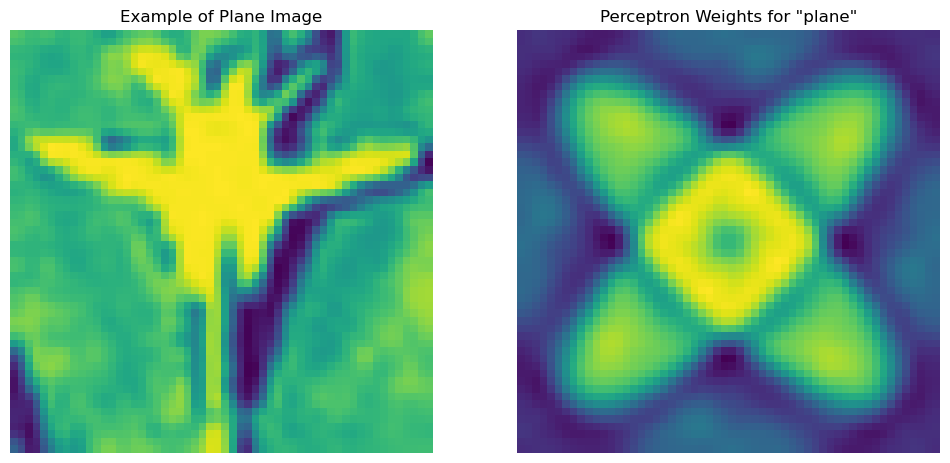

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Find a 'plane' index
plane_label = type_df[type_df['class'] == 'plane']['label'].iloc[0]
plane_indices = np.where(y_test == plane_label)[0]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Show the fist 'plane' image
plane_image = X_test[plane_indices[0]].reshape(28, 28)
current_img = Image.fromarray(plane_image.astype(np.uint8))
# Change the figure size
resized_image = current_img.resize((56, 56), Image.BILINEAR)
# Plot the figure
plt.imshow(resized_image, cmap="viridis")
plt.title('Example of Plane Image')
plt.axis('off')

# show the perceptron weights
plt.subplot(1, 2, 2)
weights = p_example.get_weights().reshape(28, 28)
weights_min = weights.min()
weights_max = weights.max()
normalized_weights = (weights - weights_min) / (weights_max - weights_min)
# Converts normalized image data back to a range of 0-255 and uint8
current_img = Image.fromarray((normalized_weights*255).astype(np.uint8))   
resized_image = current_img.resize((56, 56), Image.BILINEAR)
plt.imshow(resized_image, cmap='viridis')
plt.title('Perceptron Weights for "plane"')
plt.axis('off')

plt.show()